In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image as image_utils

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

2024-04-20 17:33:16.001919: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-20 17:33:16.001986: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-20 17:33:16.002662: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-20 17:33:16.008510: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
train_image_dir = '/blue/bsc4892/adrian.l/Jaws_augmented_images'
valid_image_dir = './Jaws_validation_images/'

print("Training class number:", len(os.listdir(train_image_dir)))
print("Validation class number:", len(os.listdir(valid_image_dir)))

Training class number: 18
Validation class number: 18


In [3]:
# Input image dimensions, etc.
resized_height = 224
resized_width = 224
num_channel = 3 
num_classes = 18
batch_size = 32

In [4]:
# load train images while making everything into 1 batch
#import os

# data_dir = './Jaws_labeled_images/*'
# num_images = len(os.listdir(data_dir))

train_images = image_dataset_from_directory(
    train_image_dir, labels='inferred', label_mode='categorical',
     color_mode='rgb', image_size=(resized_height ,
    resized_width ), batch_size=batch_size, shuffle=True, seed=42,
    interpolation='bilinear', follow_links=False,
    crop_to_aspect_ratio=False)
print(train_images)

Found 4780 files belonging to 18 classes.


2024-04-20 17:33:59.057121: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 79087 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:b7:00.0, compute capability: 8.0


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 18), dtype=tf.float32, name=None))>


In [5]:
valid_images = image_dataset_from_directory(
    valid_image_dir, labels='inferred', label_mode='categorical',
     color_mode='rgb', image_size=(resized_height ,
    resized_width ), batch_size=32, shuffle=True, seed=42,
    interpolation='bilinear', follow_links=False,
    crop_to_aspect_ratio=False)
print(valid_images)

Found 23 files belonging to 18 classes.
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 18), dtype=tf.float32, name=None))>


['Carcharhinidae', 'Carcharhinus', 'Carcharhinus_brachyurus', 'Carcharhinus_leucas', 'Carcharhinus_limbatus', 'Carcharhinus_perezi', 'Carcharias_taurus', 'Carcharodon_carcharias', 'Galeocerdo_cuvier', 'Ginglymostoma_cirratum', 'Isistius_brasiliensis', 'Isurus_oxyrhinchus', 'Nebrius_ferrugineus', 'Negaprion_acutidens', 'Orectolobus', 'Orectolobus_ornatus', 'Squatina', 'Triaenodon_obesus']
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


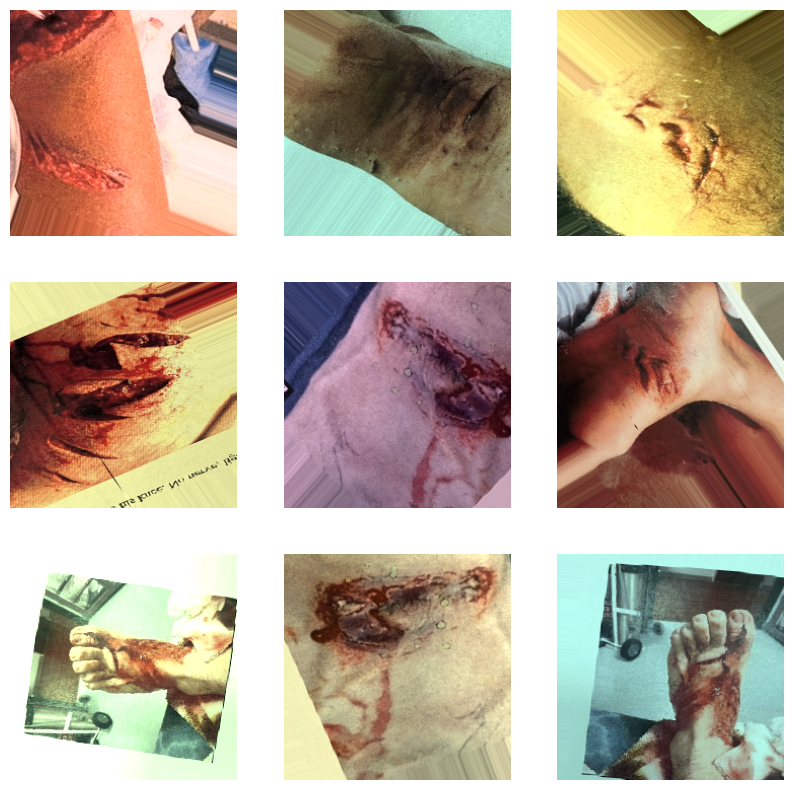

In [7]:
# Note that the images have been loaded with 3 color channels!
class_names = train_images.class_names
print(class_names)
plt.figure(figsize=(10, 10))
for images, labels in train_images.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    #plt.title(class_names[labels[i]])
    plt.axis("off")
    print(images[i].shape)

In [ ]:
# # Initialize empty lists to store images and labels
# images = []
# labels = []

# # Iterate over the dataset to extract images and labels
# for image_batch, label_batch in train_images:
#     images.append(image_batch.numpy())
#     labels.append(label_batch.numpy())

# # Concatenate the lists of images and labels
# image_array = np.concatenate(images, axis=0)
# label_array = np.concatenate(labels, axis=0)

# print("Images shape:", image_array.shape)  # Output: (88, 224, 224, 3)
# print("Labels shape:", label_array.shape)  # Output: (88, 18)

In [ ]:
# from keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest',
# )


In [ ]:
# from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# def augment_images(image, label):
#     image = datagen.random_transform(image)
#     return image, label
# input_shape = (224, 224, 3)

# augmented_dataset = train_images.map(augment_images)

In [ ]:
# # test script with one image
# img = load_img('./Jaws_labeled_images/Carcharhinidae/IMG_0180_Large.png')
# x = img_to_array(img)
# x = x.reshape((1,) + x.shape)
# print(x.shape)

In [ ]:
# augmented_images = datagen.flow(image_array)

# for i in range(10):
#     augmented_image = next(augmented_images)[0]  # Retrieve the augmented image from the generator
#     plt.imshow(augmented_image.astype('uint8')) # Plot the augmented image
#     plt.show()

In [ ]:
# # # Reshape the image to (1, height, width, channels) for the datagen.flow() method
# # image = np.expand_dims(x, axis=0)

# # Generate augmented images indefinitely
# augmented_images = datagen.flow(image_array, label_array)

# x, y = next(augmented_images)
# print(x.shape, y.shape)
# # fig, ax = plt.subplots(nrows=4, ncols=8)
# for i in range(batch_size):
#     image = x[i]
# #     ax.flatten()[i].imshow(np.squeeze(image))
#     plt.imshow(image.astype('uint8'))
#     plt.show()



In [ ]:
# augmented_images = datagen.flow(image_array, label_array)

# x, y = next(augmented_images)

# num_rows = 4
# num_cols = 8

# fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

# for i in range(batch_size):
#     row = i // num_cols
#     col = i % num_cols
#     augmented_image = x[i]
#     axes[row, col].imshow(augmented_image.astype('uint8'))  # Plot the augmented image
#     axes[row, col].axis('off')  # Turn off axis labels

# plt.tight_layout()
# plt.show()

In [ ]:
# # Initialize arrays to store generated images and labels
# generated_images = []
# generated_labels = []


# num_batches = 100

# for _ in range(num_batches):
#     x_batch, y_batch = next(augmented_images)
#     generated_images.extend(x_batch)
#     generated_labels.extend(y_batch)

# # Convert lists to numpy arrays
# generated_images = np.array(generated_images)
# generated_labels = np.array(generated_labels)

# # Verify the shape of generated data
# print("Shape of generated images:", generated_images.shape)
# print("Shape of generated labels:", generated_labels.shape)

In [ ]:
# for i in range(5):
#     plt.imshow(generated_images[i].astype('uint8')) # Plot the augmented image
#     plt.show()

## Toy model

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])


# CNNs are more concise and have fewer parameteres than dense layers

In [ ]:
# # Fit the generator on the training data
# datagen.fit(image_array)

# # Compile the new model
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_images, epochs=3, verbose=1, validation_data=valid_images)

Epoch 1/3


2024-04-20 17:34:10.457947: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8800
2024-04-20 17:34:11.831158: I external/local_xla/xla/service/service.cc:168] XLA service 0x1505d889bfd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-20 17:34:11.831194: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA A100-SXM4-80GB, Compute Capability 8.0
2024-04-20 17:34:11.836049: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1713648851.932707 3735542 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


150/150 [==============================] - 81s 478ms/step - loss: 52.9336 - accuracy: 0.5985 - val_loss: 2.5935 - val_accuracy: 0.3478
Epoch 2/3
150/150 [==============================] - 77s 484ms/step - loss: 1.4549 - accuracy: 0.6575 - val_loss: 2.6314 - val_accuracy: 0.3478
Epoch 3/3
150/150 [==============================] - 51s 326ms/step - loss: 1.0226 - accuracy: 0.7282 - val_loss: 3.6050 - val_accuracy: 0.2609


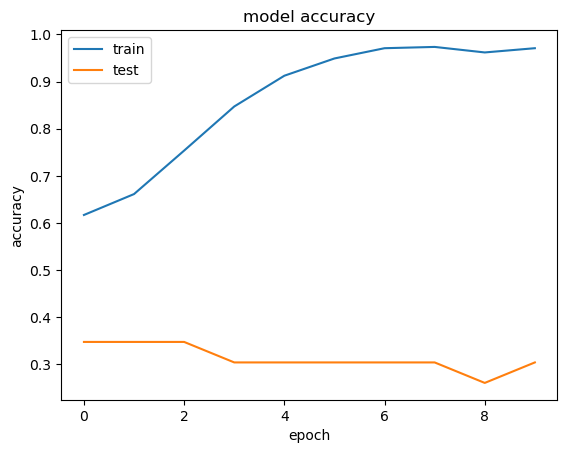

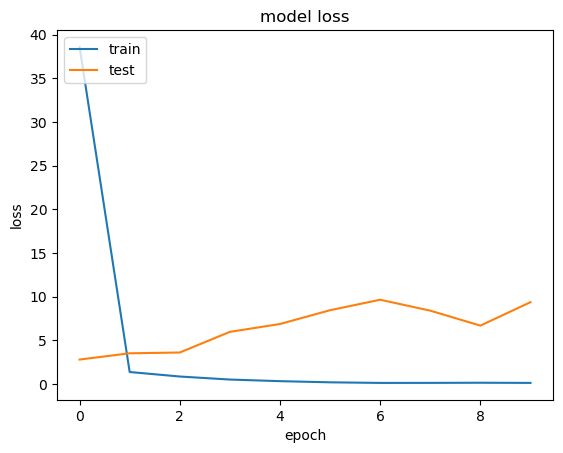

In [10]:
from helpers_plot_history import plot_history
plot_history(history)

In [ ]:
# history= model.fit(augmented_images,
#           epochs=20,
# #          steps_per_epoch=4,
#           validation_data=valid_images)

# Below are test scripts

In [ ]:


import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define an ImageDataGenerator with augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load a sample image
image = np.random.random((224, 224, 3))

# Reshape the image to (1, height, width, channels) for the datagen.flow() method
image = np.expand_dims(image, axis=0)

# Generate augmented images indefinitely
augmented_images = datagen.flow(image)

# Specify how many augmented images you want to generate
num_images_to_generate = 5

# Generate and plot the specified number of augmented images
for i in range(num_images_to_generate):
    augmented_image = next(augmented_images)[0]  # Retrieve the augmented image from the generator
    plt.imshow(augmented_image.astype('uint8'))  # Plot the augmented image
    plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define an ImageDataGenerator with augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load a sample image
image = np.random.random((224, 224, 3))

# Reshape the image to (1, height, width, channels) for the datagen.flow() method
image = np.expand_dims(image, axis=0)

# Generate augmented images indefinitely
augmented_images = datagen.flow(image)

# Generate and plot 32 augmented images in an 8x4 grid plot
num_images_to_generate = 32
num_rows = 8
num_cols = 4

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 30))

for i in range(num_images_to_generate):
    row = i // num_cols
    col = i % num_cols
    augmented_image = next(augmented_images)[0]  # Retrieve the augmented image from the generator
    axes[row, col].imshow(augmented_image.astype('uint8'))  # Plot the augmented image
    axes[row, col].axis('off')  # Turn off axis labels

plt.tight_layout()
plt.show()
